# Price Finder Image Classification Model

In [31]:
import os

# walk through images directory and list number of files
for dirparth, dirnames, filenames in os.walk("images"):
  print("There are", len(dirnames), "directories and", len(filenames), "images in", dirparth)

There are 2 directories and 0 images in images
There are 2 directories and 0 images in images\test
There are 0 directories and 284 images in images\test\Alto 2015
There are 0 directories and 104 images in images\test\Hero Dash 2016
There are 2 directories and 0 images in images\train
There are 0 directories and 1131 images in images\train\Alto 2015
There are 0 directories and 415 images in images\train\Hero Dash 2016


In [32]:
# get the class names 

import pathlib
import numpy as np

data_dir = pathlib.Path("images/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # create a list of class_names from the subdirectories
print(class_names) 

['Alto 2015' 'Hero Dash 2016']


In [33]:
# visualize 

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # setup the target directory
  target_folder = target_dir + target_class

  # get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print("Image shape: ", img.shape)

  return img

['0754.jpg']
Image shape:  (450, 600, 3)


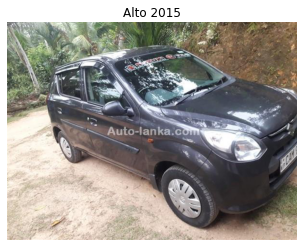

In [34]:
# view a random image from train

img = view_random_image(target_dir="images/train/", target_class="Alto 2015")

In [6]:
img

array([[[  0,  10,   0],
        [  0,  10,   0],
        [ 44,  68,  44],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 62,  86,  62],
        [ 67,  91,  67],
        [ 58,  82,  56],
        ...,
        [248, 248, 248],
        [244, 244, 244],
        [253, 253, 253]],

       [[ 74,  99,  70],
        [ 75, 100,  71],
        [ 39,  64,  34],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [251, 251, 251]],

       ...,

       [[218, 215, 210],
        [239, 236, 231],
        [176, 173, 168],
        ...,
        [144, 134, 132],
        [194, 184, 182],
        [190, 180, 178]],

       [[174, 171, 166],
        [147, 144, 139],
        [198, 195, 190],
        ...,
        [181, 171, 169],
        [199, 189, 187],
        [178, 168, 166]],

       [[179, 176, 171],
        [110, 107, 102],
        [151, 148, 143],
        ...,
        [205, 195, 193],
        [160, 150, 148],
        [200, 190, 188]]

In [7]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(360, 640, 3), dtype=uint8, numpy=
array([[[  0,  10,   0],
        [  0,  10,   0],
        [ 44,  68,  44],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 62,  86,  62],
        [ 67,  91,  67],
        [ 58,  82,  56],
        ...,
        [248, 248, 248],
        [244, 244, 244],
        [253, 253, 253]],

       [[ 74,  99,  70],
        [ 75, 100,  71],
        [ 39,  64,  34],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [251, 251, 251]],

       ...,

       [[218, 215, 210],
        [239, 236, 231],
        [176, 173, 168],
        ...,
        [144, 134, 132],
        [194, 184, 182],
        [190, 180, 178]],

       [[174, 171, 166],
        [147, 144, 139],
        [198, 195, 190],
        ...,
        [181, 171, 169],
        [199, 189, 187],
        [178, 168, 166]],

       [[179, 176, 171],
        [110, 107, 102],
        [151, 148, 143],
        ...,
        [205, 195, 19

In [8]:
# get all the pixel values between 0 and 1
img/225.

array([[[0.        , 0.04444444, 0.        ],
        [0.        , 0.04444444, 0.        ],
        [0.19555556, 0.30222222, 0.19555556],
        ...,
        [1.13333333, 1.13333333, 1.13333333],
        [1.13333333, 1.13333333, 1.13333333],
        [1.13333333, 1.13333333, 1.13333333]],

       [[0.27555556, 0.38222222, 0.27555556],
        [0.29777778, 0.40444444, 0.29777778],
        [0.25777778, 0.36444444, 0.24888889],
        ...,
        [1.10222222, 1.10222222, 1.10222222],
        [1.08444444, 1.08444444, 1.08444444],
        [1.12444444, 1.12444444, 1.12444444]],

       [[0.32888889, 0.44      , 0.31111111],
        [0.33333333, 0.44444444, 0.31555556],
        [0.17333333, 0.28444444, 0.15111111],
        ...,
        [1.13333333, 1.13333333, 1.13333333],
        [1.13333333, 1.13333333, 1.13333333],
        [1.11555556, 1.11555556, 1.11555556]],

       ...,

       [[0.96888889, 0.95555556, 0.93333333],
        [1.06222222, 1.04888889, 1.02666667],
        [0.78222222, 0

In [40]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# seed
tf.random.set_seed(42)

# preprocess data (pixel values between 0 and 1, also called scalling / normalization)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# path to data directories
train_dir = "images/train"
test_dir = "images/test"

# import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir, batch_size = 32, target_size = (224,224), class_mode = "binary", seed = 42)
valid_data = valid_datagen.flow_from_directory(test_dir, batch_size = 32, target_size = (224,224), class_mode = "binary", seed = 42)

# same as the tiny VGG model

model_1 = tf.keras.models.Sequential([
                                     tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = "relu", input_shape = (224,224,3)),
                                     tf.keras.layers.Conv2D(10, 3, activation = "relu"),
                                     tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
                                     tf.keras.layers.Conv2D(10, 3, activation="relu"),
                                     tf.keras.layers.Conv2D(10, 3, activation="relu"),
                                     tf.keras.layers.MaxPool2D(2),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile

model_1.compile(loss = "binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1543 images belonging to 2 classes.
Found 385 images belonging to 2 classes.
Epoch 1/5
49/49 [==============================] - 34s 700ms/step - loss: 0.5989 - accuracy: 0.7285 - val_loss: 0.5937 - val_accuracy: 0.7299
Epoch 2/5
49/49 [==============================] - 33s 665ms/step - loss: 0.4773 - accuracy: 0.7784 - val_loss: 0.4380 - val_accuracy: 0.7870
Epoch 3/5
49/49 [==============================] - 32s 657ms/step - loss: 0.3215 - accuracy: 0.8496 - val_loss: 0.3235 - val_accuracy: 0.8649
Epoch 4/5
49/49 [==============================] - 32s 654ms/step - loss: 0.2419 - accuracy: 0.8950 - val_loss: 0.3048 - val_accuracy: 0.8857
Epoch 5/5
49/49 [==============================] - 32s 653ms/step - loss: 0.1806 - accuracy: 0.9300 - val_loss: 0.3045 - val_accuracy: 0.8779


In [37]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

## Preprocess the data (prepare it for a model)

In [41]:
# create train and test data generators and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [42]:
# Lord in our image data from directories and turn them into batches

train_data = train_datagen.flow_from_directory(directory = train_dir, # target directory of the images
                                               target_size = (224, 224),  # Target size of images (height, width)
                                               class_mode = "binary", # type of data
                                               batch_size = 32) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size  = (224, 224),
                                             class_mode = "binary",
                                             batch_size = 32)

Found 1543 images belonging to 2 classes.
Found 385 images belonging to 2 classes.


In [43]:
# get a sample of a train data bacth

images, labels = train_data.next() # get the next batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [44]:
# how many batches are there
len(train_data)

49

In [45]:
images[7].shape

(224, 224, 3)

## Create a CNN model (baseline)

In [47]:
from tensorflow.keras.optimizers import  Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [48]:
# create model (baseline - 3 layer convolutional neural network)

model_2 = Sequential([
                      Conv2D(filters=10,                 # filter is the number of sliding windows across an input (higher = more complex)  
                             kernel_size=3,              # size of the sliding window going across an input
                             strides=1,                  # size of the step the sliding window takes acorss an input
                             padding="valid",            # if "same" output shape is the same as input shape, if "valid", output shape gets compressed
                             activation="relu",
                             input_shape=(224, 224, 3)),  # input layer (specify input shape)
                      Conv2D(10, 3, activation="relu"),
                      Conv2D(10, 3, activation="relu"),
                      Flatten(),
                      Dense(1, activation="sigmoid")      # output layer (working with binary classification so only 1 output neuron)
])

In [50]:
# compile

model_2.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [52]:
# get summary 
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_2 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________
